<center><h1>Computational Linear Algebra: PCA Homework</h1></center>

<center><strong>Academic Year:</strong> 2024/2025</center>

<center>Al Ashi Abou Shoushe, Abedal Salam (336648)</center>


#### Dependencies and Module Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score, normalized_mutual_info_score

random_seed = 336648
np.random.seed(random_seed)

In [2]:
var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

def which_featgroups():
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Movies
Interests
*************************************
*** THESE ARE THE SELECTED FEATURES:
Fake
Appearence and gestures
Number of friends
Reliability
Final judgement
Mood swings
Daily events
Assertiveness
Getting up
Happiness in life
Keeping promises
Changing the past
Socializing
Loss of interest
Compassion to animals
Prioritising workload
Knowing the right people
Getting angry
Eating to survive
Punctuality
Children
God
Loneliness
Small - big dogs
Cheating in school
Dreams
Judgment calls
Writing notes
Unpopularity
Waiting
Responding to a serious letter
Friends versus money
Parents' advice
Elections
Hypochondria
Self-criticism
Giving
Criminal damage
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
History
Psychology
Politics
Mathemat

## Exercise 1. Preparing the Dataset

#### 1.1: Load the dataset

In [3]:
path = 'data/responses_hw.csv'
df = pd.read_csv(path)
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right,secondary school,no,village,house/bungalow


#### 1.2: Creating and Sampling the Working DataFrame (X_df)

In [4]:
X_df = df[these_features].copy()

# Randomly selecting 2/3 of the rows
X_df = X_df.sample(frac=2/3).reset_index(drop=True)
X_df.head()

,Fake,Appearence and gestures,Number of friends,Reliability,Final judgement,Mood swings,Daily events,Assertiveness,Getting up,Happiness in life,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,2.0,4,4.0,1.0,5.0,2.0,4.0,2.0,5.0,...,1.0,4.0,1.0,2.0,1.0,4.0,5.0,5.0,5.0,3.0
1,1.0,4.0,4,1.0,1.0,5.0,2.0,5.0,5.0,2.0,...,5.0,5.0,1.0,2.0,5.0,2.0,5.0,4.0,3.0,4.0
2,2.0,3.0,4,4.0,3.0,3.0,2.0,4.0,4.0,5.0,...,3.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,1.0,2.0
3,3.0,3.0,5,4.0,5.0,4.0,5.0,3.0,2.0,4.0,...,5.0,3.0,1.0,3.0,3.0,4.0,2.0,5.0,1.0,1.0
4,2.0,4.0,4,3.0,3.0,3.0,3.0,3.0,5.0,4.0,...,4.0,5.0,1.0,3.0,3.0,2.0,2.0,4.0,2.0,5.0


#### 1.3: Analyzing and Cleaning the DataFrame (Cleansing and Encoding)

In [5]:
# Analyze missing values
X_df.isnull().sum()

Fake                       1
Appearence and gestures    2
Number of friends          0
Reliability                2
Final judgement            6
                          ..
Science and technology     3
Theatre                    1
Fun with friends           1
Adrenaline sports          2
Pets                       3
Length: 95, dtype: int64

In [6]:
# Fill numerical columns with mean
for col in X_df.columns:
    if X_df[col].dtype in ['float64']:
        X_df[col] = X_df[col].fillna(X_df[col].mean())

# Using one-hot encoding for categorical variables
X_df = pd.get_dummies(X_df, drop_first=True)

# Analyze missing values
print("Missing values per column:")
print(X_df.isnull().sum())

Missing values per column:
Fake                       0
Appearence and gestures    0
Number of friends          0
Reliability                0
Final judgement            0
                          ..
Smoking_former smoker      0
Smoking_never smoked       0
Smoking_tried smoking      0
Alcohol_never              0
Alcohol_social drinker     0
Length: 99, dtype: int64


## Exercise 2. Analyzing the Variance and the PCs

#### 2.1: Creating Scaled DataFrames: StandardScaler (Xstd_df) and MinMaxScaler (Xmm_df)

In [7]:
# Apply StandardScaler
scaler_std = StandardScaler()
Xstd_df = pd.DataFrame(scaler_std.fit_transform(X_df), columns=X_df.columns)

# Apply MinMaxScaler
scaler_mm = MinMaxScaler()
Xmm_df = pd.DataFrame(scaler_mm.fit_transform(X_df), columns=X_df.columns)

#### 2.2: Comparing Variance of Features in Original, Standard Scaled, and MinMax Scaled DataFrames

In [8]:
# Compute variance of each feature in the three datasets
variance_original = X_df.var()
variance_standard = Xstd_df.var()
variance_minmax = Xmm_df.var()

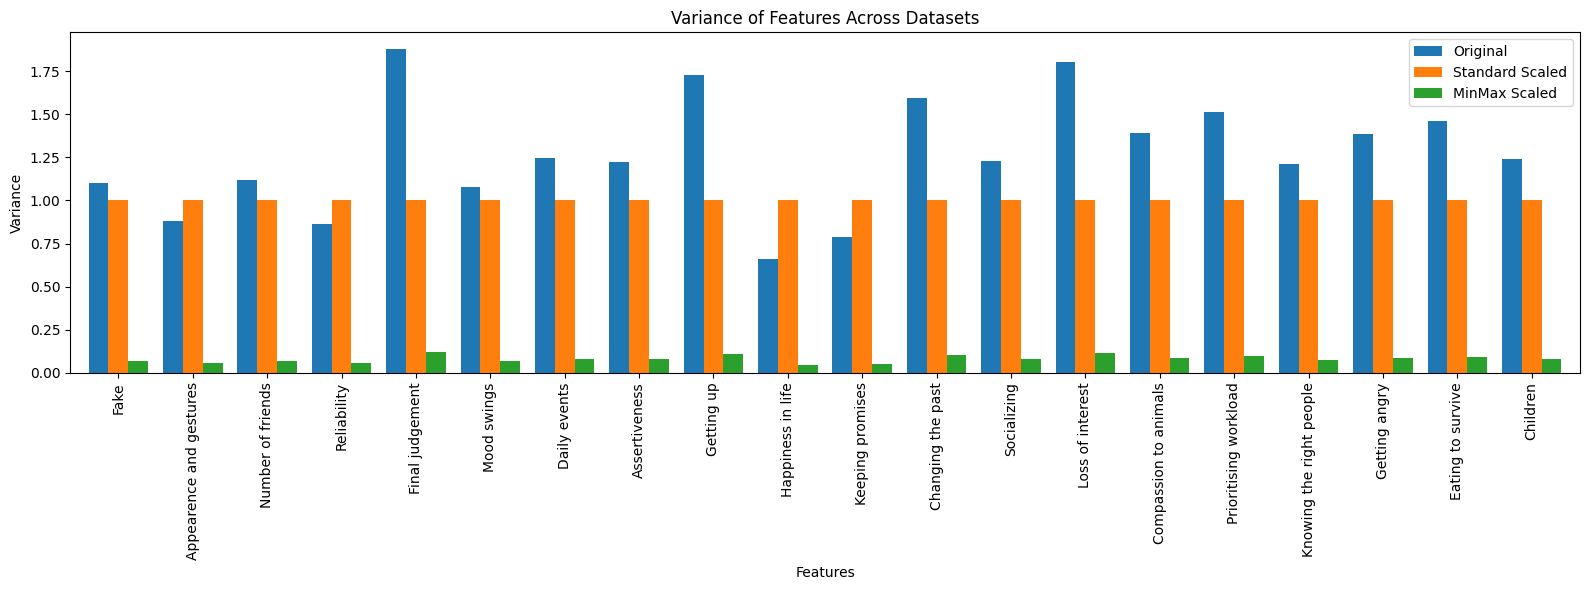

In [9]:
# Combine variances into a single DataFrame for easier plotting
variance_df = pd.DataFrame({
    'Original': variance_original[:20],
    'Standard Scaled': variance_standard[:20],
    'MinMax Scaled': variance_minmax[:20]
})

# Plot the variances as a bar plot
variance_df.plot(kind='bar', figsize=(16, 6), width=0.8)
plt.title("Variance of Features Across Datasets")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

This plot visualizes the variance of features in the three datasets: the original dataset (`X_df`), the standardized dataset (`Xstd_df`), and the Min-Max scaled dataset (`Xmm_df`).

The **Original Dataset** exhibits a wide range of variances across features, with some features dominating due to their larger scales.<br>
The **Standardized Dataset** transforms all features to have variances approximately equal to 1. This ensures balanced contributions from all features.<br>
The **Min-Max Scaled Dataset** reduces variances to near 0 by normalizing all features to a fixed range (e.g., 0 to 1).


#### 2.3: PCA Analysis: Cumulative Explained Variance for Original, Standard Scaled, and MinMax Scaled DataFrames

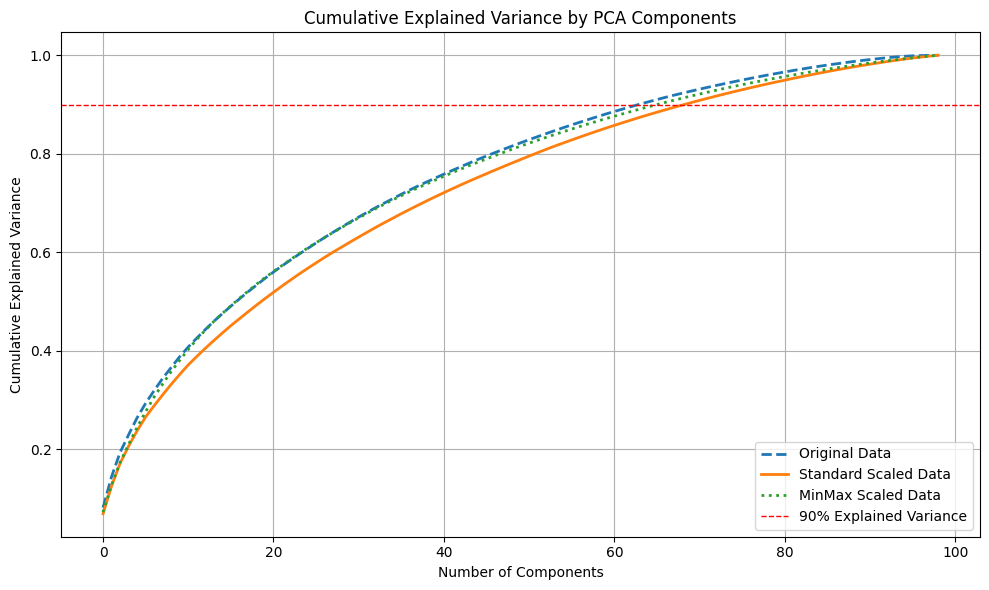

In [10]:
# Function to compute cumulative explained variance
def compute_pca(data):
    pca = PCA() # For all n components
    pca.fit(data)
    return pca.explained_variance_ratio_.cumsum()

# Apply PCA to the datasets
cumulative_variance_original = compute_pca(X_df)
cumulative_variance_standard = compute_pca(Xstd_df)
cumulative_variance_minmax = compute_pca(Xmm_df)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_original, label='Original Data', linewidth=2, linestyle='--')
plt.plot(cumulative_variance_standard, label='Standard Scaled Data', linewidth=2, linestyle='-')
plt.plot(cumulative_variance_minmax, label='MinMax Scaled Data', linewidth=2, linestyle=':')

# Add a horizontal line for 90% explained variance
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1, label='90% Explained Variance')

# Add labels, title, and legend
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

This plot visualizes the cumulative explained variance by **all \(n\) Principal Components** for the three datasets: the original dataset (`X_df`), the standardized dataset (`Xstd_df`), and the Min-Max scaled dataset (`Xmm_df`).

The **Original Dataset** requires the fewest components to reach 90% explained variance (62), closely followed by the **Standardized Dataset** (64) and **Min-Max Scaled Dataset** (67).<br>
Scaling (standardization or Min-Max scaling) balances feature contributions, but the differences in efficiency are relatively minor for this dataset.<br>
The choice of scaling method has a slight impact on the cumulative explained variance, with standardization performing slightly better in terms of efficiency.

## Exercise 3. Dimensionality Reduction and PC Interpretation

#### 3.1: Dimensionality Reduction with PCA: Computing $m$ Components for $33\%$ Total Variance or Maximum of 5 Components

In [11]:
def compute_m(data, variance_threshold=0.33):
    pca_full = PCA()
    pca_full.fit(data)
    cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
    m_prime = np.argmax(cumulative_variance >= variance_threshold) + 1  # +1 because indices start at 0
    nb = min(m_prime, 5)
    return nb, pca_full

# For Xstd_df
nb_std, pca_full_std = compute_m(Xstd_df)
print(f"Number of components for Xstd_df (nb_std): {nb_std}")

# For Xmm_df
nb_mm, pca_full_mm = compute_m(Xmm_df)
print(f"Number of components for Xmm_df (nb_mm): {nb_mm}")

# Perform PCA with m components for Xstd_df
pca_std = PCA(n_components=nb_std)
principal_components_std = pca_std.fit_transform(Xstd_df)

# Perform PCA with m components for Xmm_df
pca_mm = PCA(n_components=nb_mm)
principal_components_mm = pca_mm.fit_transform(Xmm_df)

Number of components for Xstd_df (nb_std): 5
Number of components for Xmm_df (nb_mm): 5


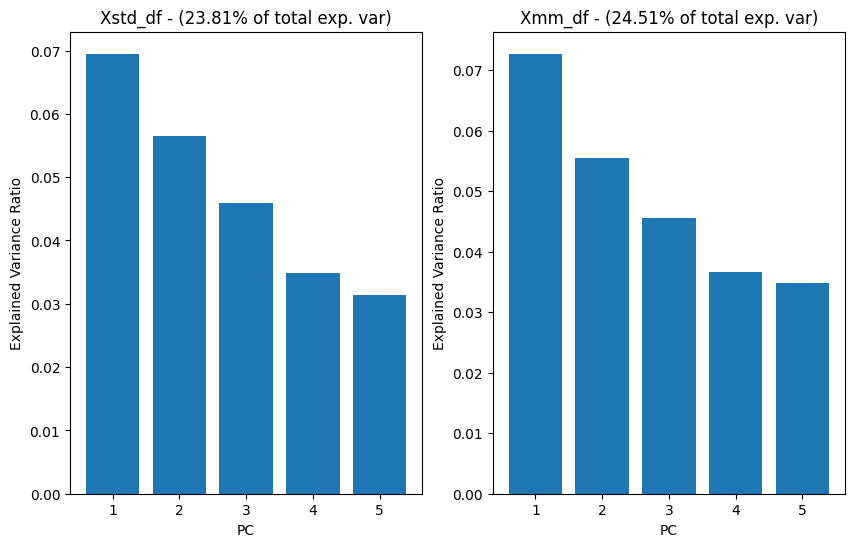

In [12]:
# plot barplots of percentage of explained variance
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].bar(range(1, nb_std+1), pca_std.explained_variance_ratio_[:nb_std])
round_expl_var_ratio = np.round(pca_std.explained_variance_ratio_[:nb_std].sum() * 100, decimals=2)
axs[0].set_title(f"Xstd_df - ({round_expl_var_ratio}% of total exp. var)")
axs[0].set_xlabel('PC')
axs[0].set_ylabel('Explained Variance Ratio')
axs[0].set_xticks(range(1, nb_std+1))  # Set x-axis ticks as integers

axs[1].bar(range(1, nb_mm+1), pca_mm.explained_variance_ratio_[:nb_mm])
round_expl_var_ratio2 = np.round(pca_mm.explained_variance_ratio_[:nb_mm].sum() * 100, decimals=2)
axs[1].set_title(f"Xmm_df - ({round_expl_var_ratio2}% of total exp. var)")
axs[1].set_xlabel('PC')
axs[1].set_ylabel('Explained Variance Ratio')
axs[1].set_xticks(range(1, nb_mm+1))  # Set x-axis ticks as integers

plt.show()

#### 3.2: Visualizing and Interpreting Principal Components (PCs) for Dimensionality Reduction

PC1:


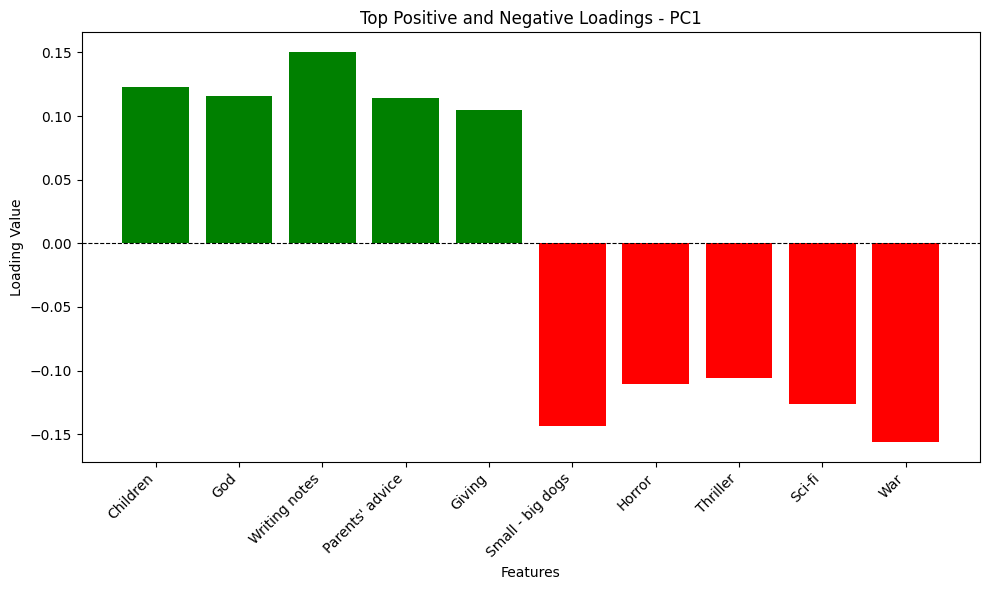


PC2:


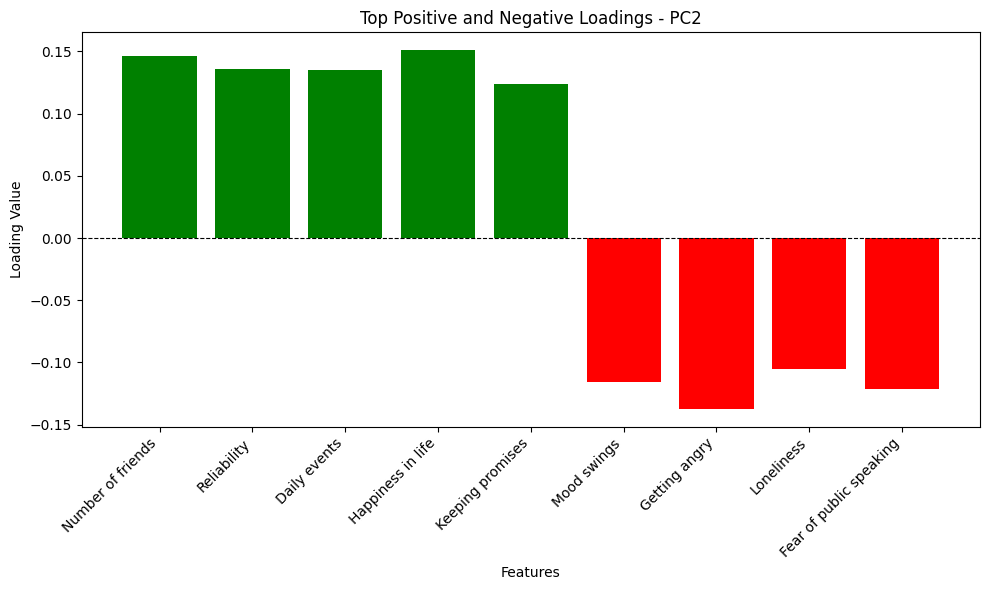


PC3:


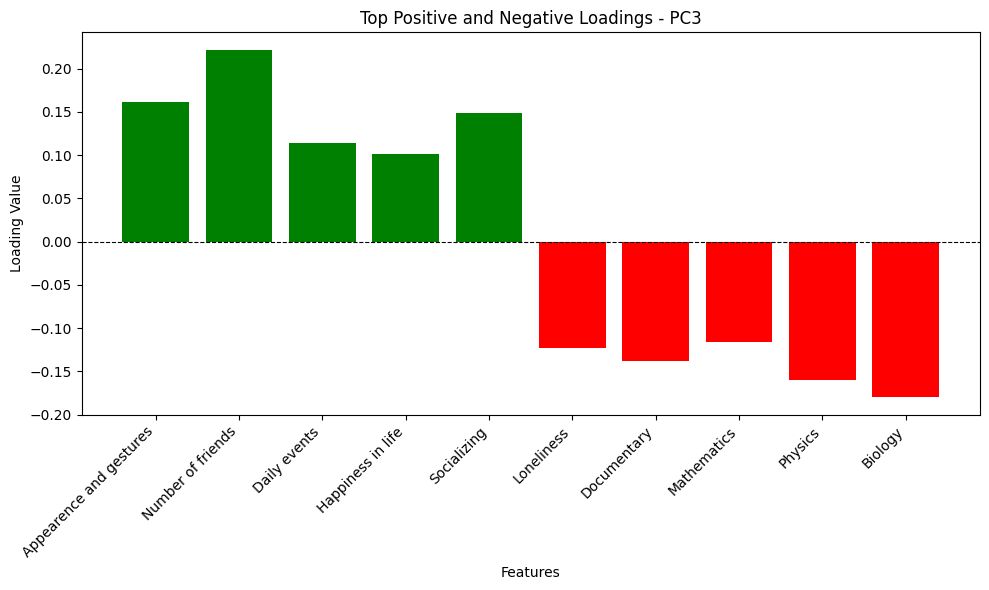


PC4:


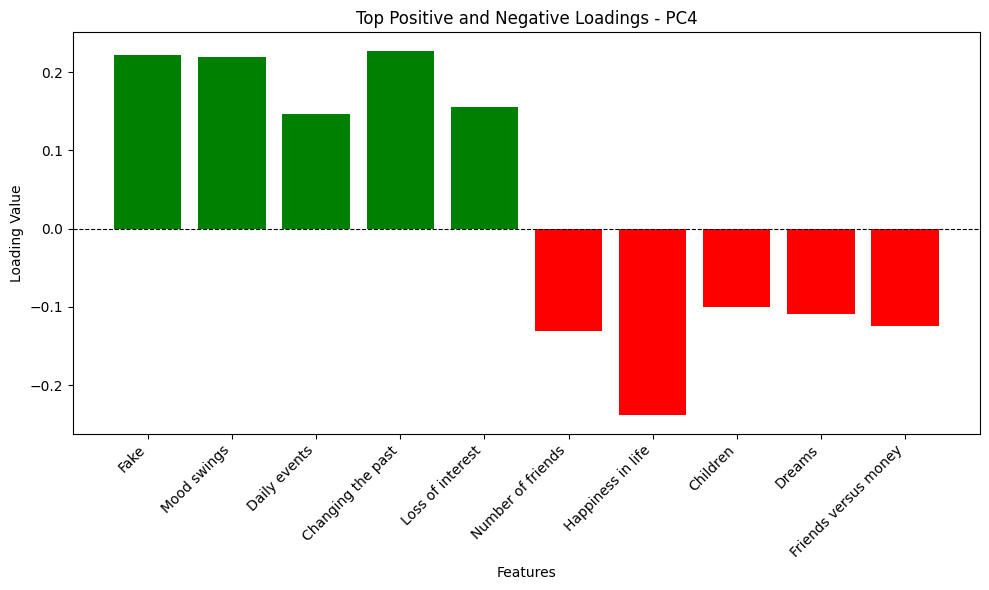


PC5:


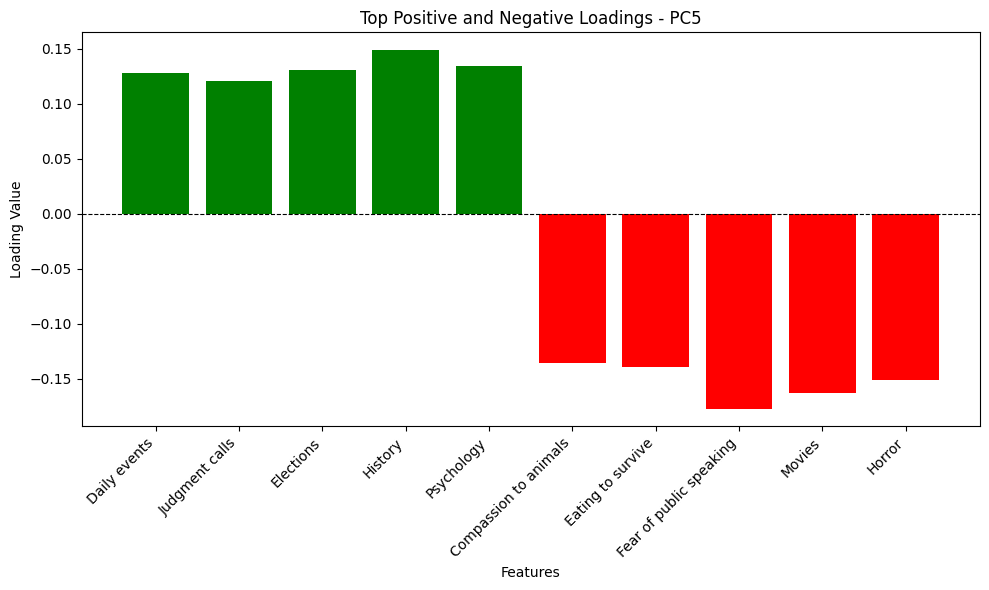

In [13]:
# Get the names of the original features
feature_names = X_df.columns.tolist()

# Get the loadings for each principal component
loadings = pca_std.components_

# Get the threshold
eps_std = np.sqrt(1 / pca_std.n_features_in_)

# Visualize top positive and negative loadings for each principal component
for i, pc in enumerate(loadings):
    print(f"PC{i+1}:")
    
    # Identify top positive and negative features
    top_pos = [(feature_names[j], pc[j]) for j in range(len(pc)) if pc[j] > eps_std][:5]
    top_neg = [(feature_names[j], pc[j]) for j in range(len(pc)) if pc[j] < -eps_std][:5]
    
    # Combine top positive and negative loadings for visualization
    features = [f[0] for f in top_pos + top_neg]  # Feature names
    values = [f[1] for f in top_pos + top_neg]   # Corresponding loadings
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(features, values, color=['green' if v > 0 else 'red' for v in values])
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.title(f"Top Positive and Negative Loadings - PC{i+1}")
    plt.ylabel("Loading Value")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print()

In [14]:
pc_std_names = [
    "Family-Oriented Values",
    "Social Reliability and Emotional Stability",
    "Scientific and Intellectual Engagement",
    "Emotional Variability and Regret",
    "Analytical Thinking and Historical Enthusiasm"
]

PC 1: This component contrasts individuals with strong family values and nurturing tendencies against those with preferences for thrilling and adventurous experiences.

PC 2: This component reflects the balance between emotional stability and social reliability versus emotional volatility and isolation.

PC 3: This component contrasts individuals who are socially active and appearance-conscious with those who lean towards scientific and intellectual interests.

PC 4: This component represents a spectrum between emotionally variable and regret-prone behavior versus social and emotional contentment.

PC 5: This component contrasts individuals with analytical thinking and historical enthusiasm against those with higher anxiety or fear-driven tendencies.

PC1:


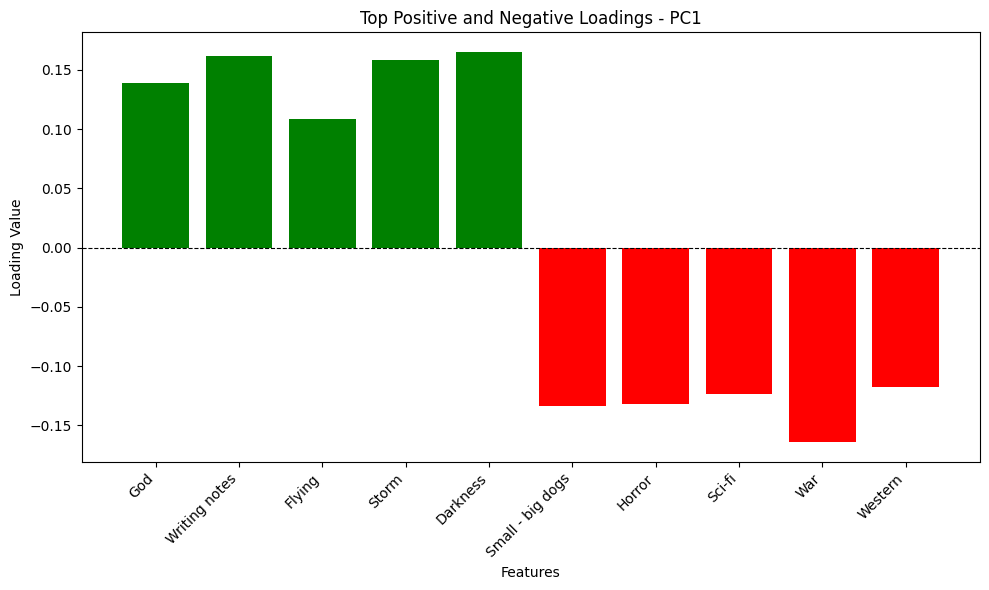


PC2:


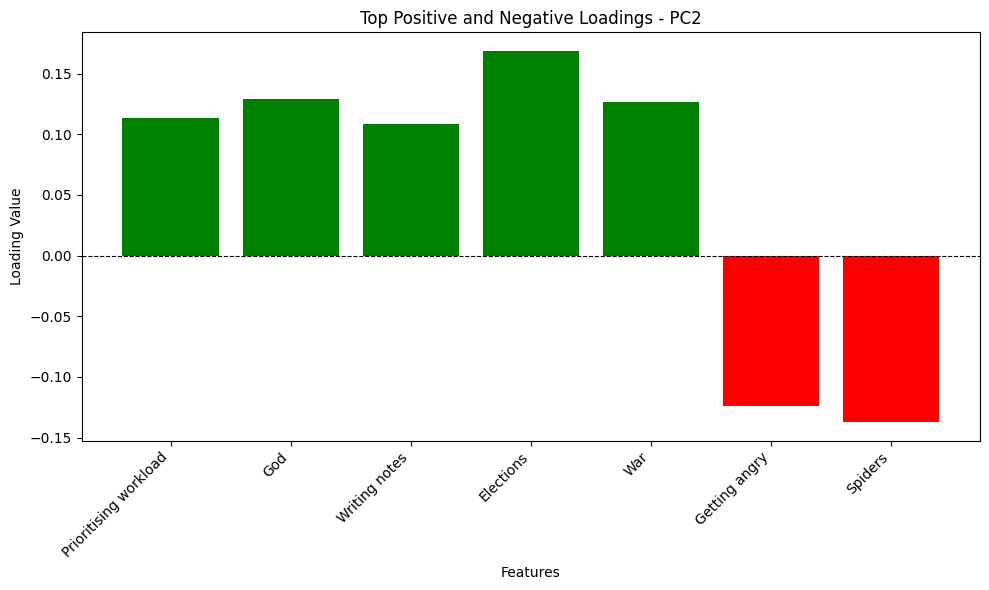


PC3:


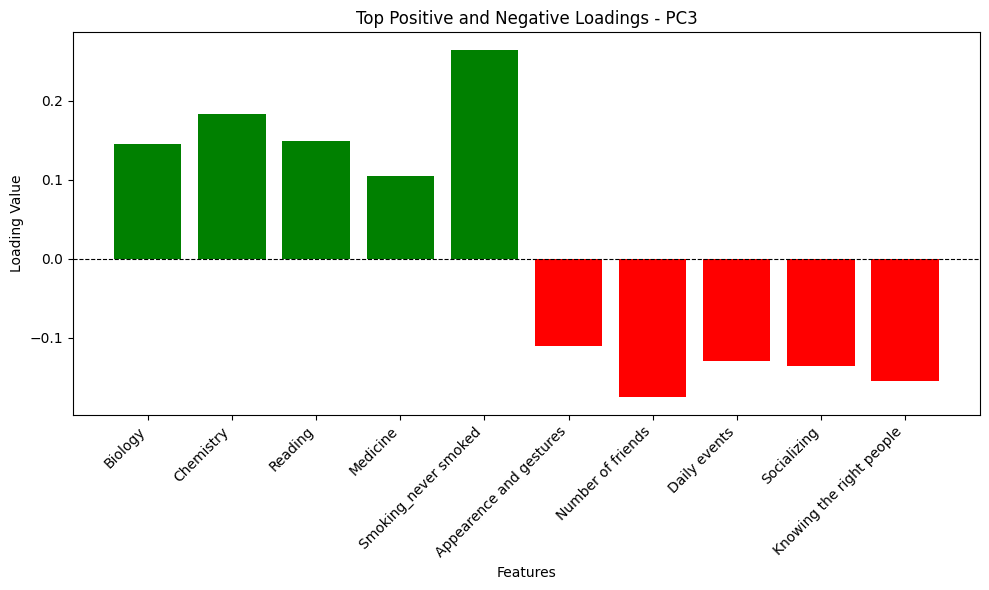


PC4:


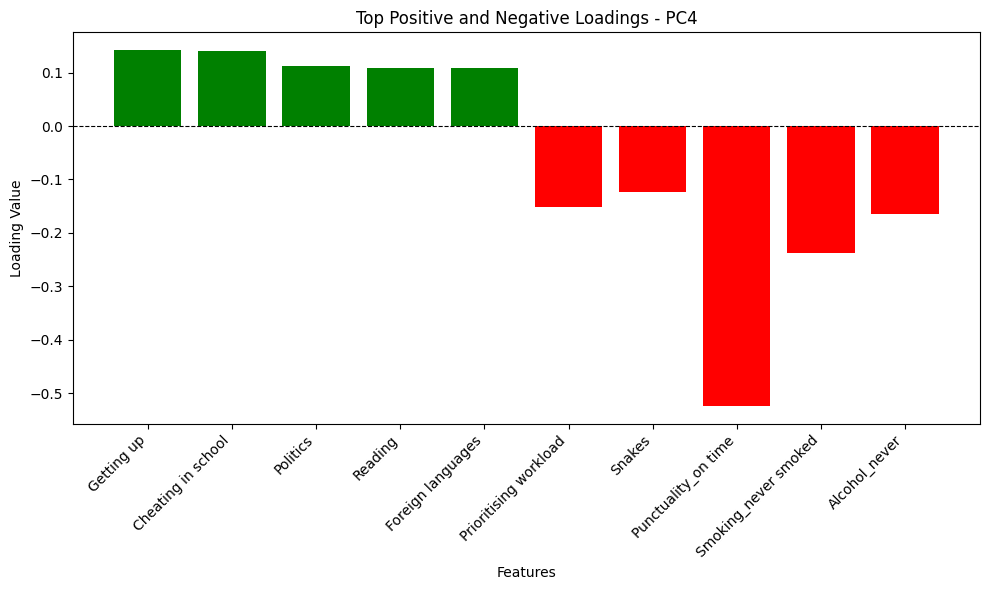


PC5:


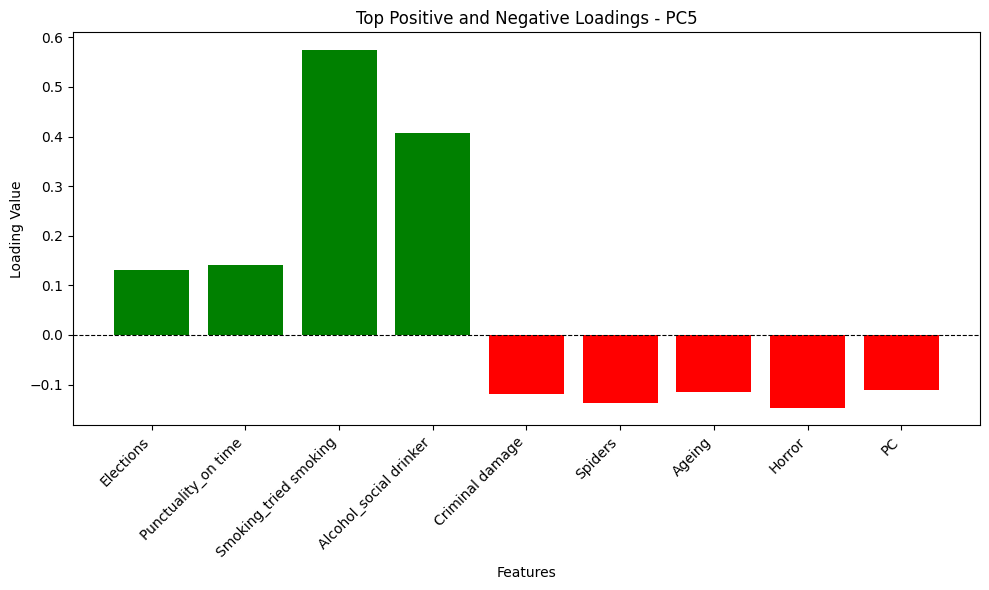

In [15]:
# Get the names of the original features
feature_names = X_df.columns.tolist()

# Get the loadings for each principal component
loadings = pca_mm.components_

# Get the threshold
eps_mm = np.sqrt(1 / pca_mm.n_features_in_)

# Visualize top positive and negative loadings for each principal component
for i, pc in enumerate(loadings):
    print(f"PC{i+1}:")
    
    # Identify top positive and negative features
    top_pos = [(feature_names[j], pc[j]) for j in range(len(pc)) if pc[j] > eps_mm][:5]
    top_neg = [(feature_names[j], pc[j]) for j in range(len(pc)) if pc[j] < -eps_mm][:5]

    # Combine top positive and negative loadings for visualization
    features = [f[0] for f in top_pos + top_neg]  # Feature names
    values = [f[1] for f in top_pos + top_neg]   # Corresponding loadings
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(features, values, color=['green' if v > 0 else 'red' for v in values])
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.title(f"Top Positive and Negative Loadings - PC{i+1}")
    plt.ylabel("Loading Value")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print()

In [16]:
pc_mm_names = [
    "Spiritual Beliefs and Risk Aversion",
    "Workload Management and Emotional Stability",
    "Scientific and Intellectual Interests",
    "Discipline and Intellectual Engagement",
    "Social Freedom and Risk-Taking"
]

PC 1: This component contrasts individuals with a strong sense of spirituality and risk aversion against those who prefer thrilling and adventurous activities.

PC 2: This component reflects a balance between individuals with strong workload management and civic responsibility versus those prone to emotional instability and fear-driven behavior.

PC 3: This component contrasts individuals with a strong inclination toward scientific and intellectual pursuits against those who thrive in social and interpersonal contexts.

PC 4: This component highlights a dichotomy between disciplined, curious individuals and those who are avoidant or rigid in their habits and choices.

PC 5: This component contrasts individuals who embrace social freedom and risk-taking behaviors against those who are more fearful, anxious, or conformist.

The comparison of the principal components (PCs) between the standardized dataset (`Xstd_df`) and the Min-Max scaled dataset (`Xmm_df`) reveals subtle differences in how the features contribute to the principal components due to the scaling methods. In `Xstd_df`, the PCs emphasize contrasts such as family values versus adventurous tendencies (PC 1), emotional stability versus volatility (PC 2), and analytical thinking versus anxiety (PC 5). These interpretations suggest that standard scaling balances feature contributions and highlights psychological and behavioral aspects. In contrast, `Xmm_df` highlights components like spirituality versus thrill-seeking (PC 1), workload management versus emotional instability (PC 2), and social freedom versus conformity (PC 5), indicating that Min-Max scaling focuses on broader dichotomies, such as personal beliefs and societal behavior. Overall, while both datasets identify similar themes, the standardized data tends to emphasize nuanced psychological contrasts, whereas the Min-Max scaled data captures broader social and personal tendencies.

#### 3.3: Score Graphs for Principal Components: Standard Scaled and Min-Max Scaled Data

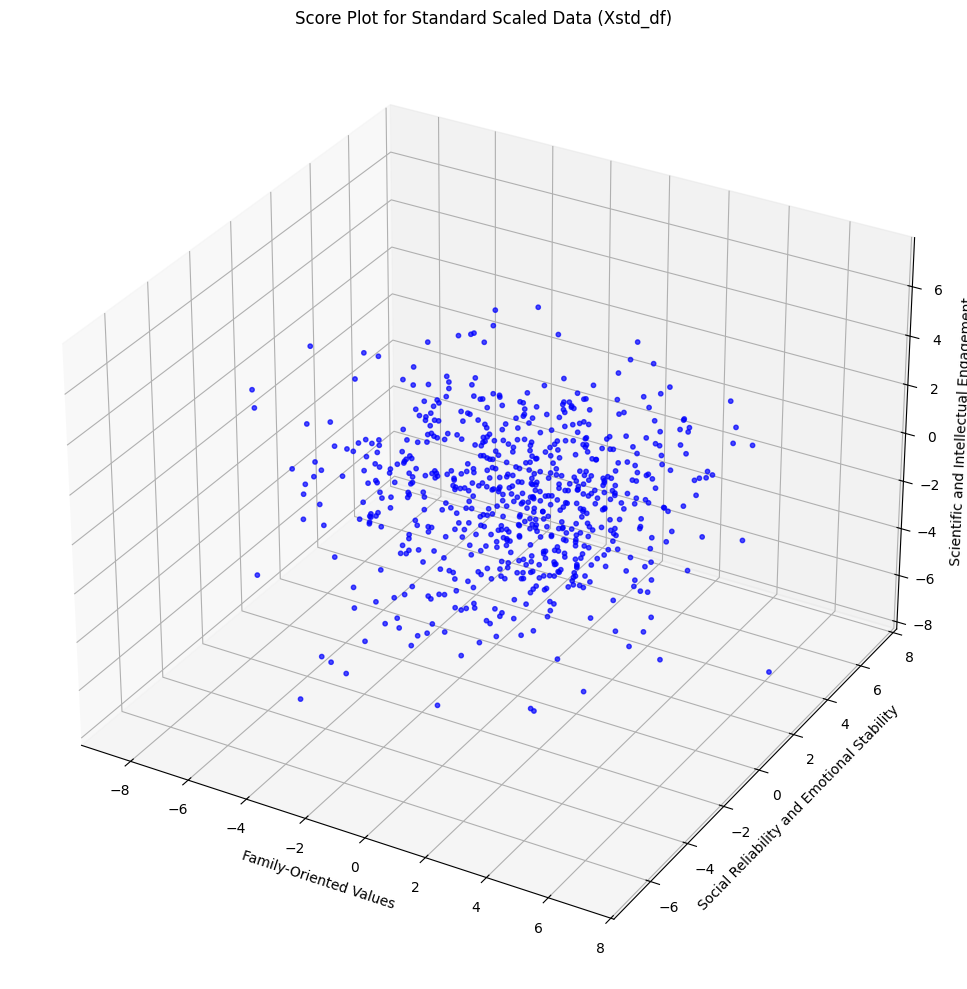

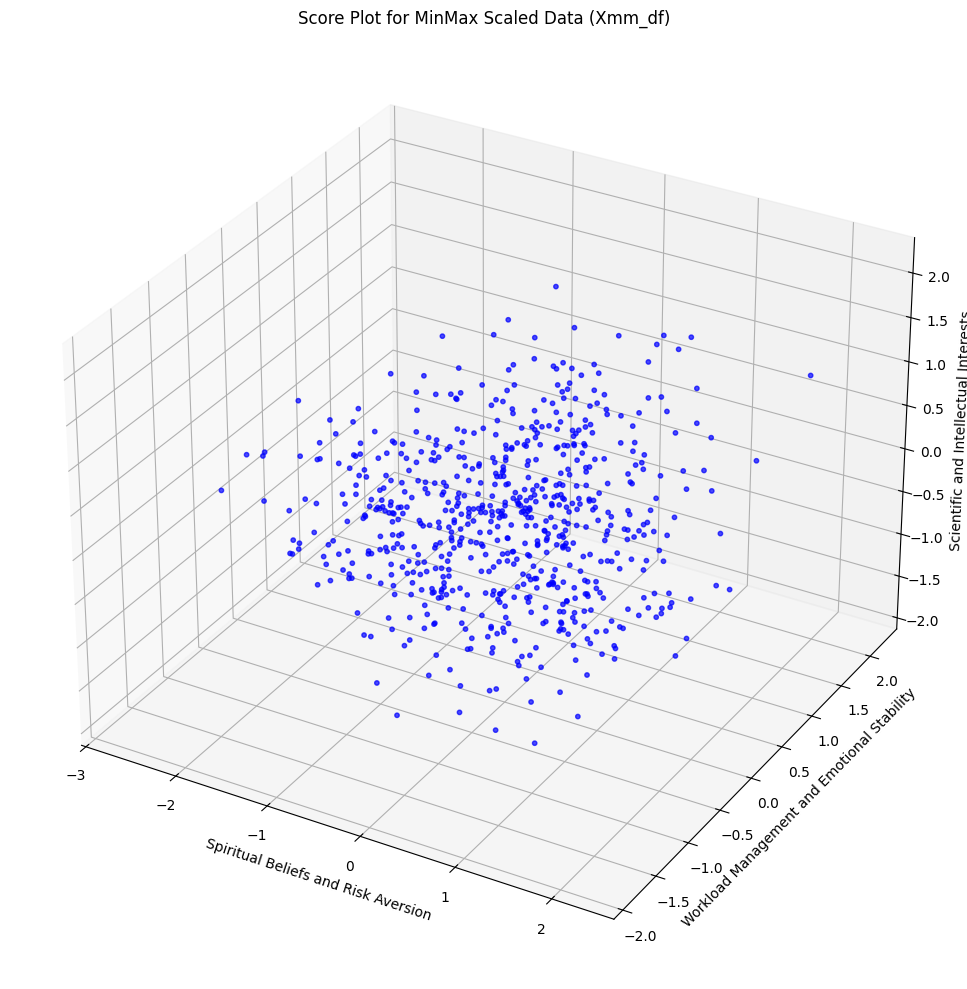

In [17]:
# Helper function to plot score graphs
def plot_scores(pca_data, pc_names, dataset_name, dims):
    fig = plt.figure(figsize=(10, 10))
    
    if dims == 2:
        # 2D Scatter Plot
        ax = fig.add_subplot(111)
        ax.scatter(pca_data[:, 0], pca_data[:, 1], s=10, alpha=0.7, c='blue')
        ax.set_xlabel(pc_names[0])
        ax.set_ylabel(pc_names[1])
    elif dims == 3:
        # 3D Scatter Plot
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], s=10, alpha=0.7, c='blue')
        ax.set_xlabel(pc_names[0])
        ax.set_ylabel(pc_names[1])
        ax.set_zlabel(pc_names[2])
    
    ax.set_title(f"Score Plot for {dataset_name}")
    plt.tight_layout()
    plt.show()

# Determine the number of dimensions for visualization
dims_std = min(nb_std, 3)
dims_mm = min(nb_mm, 3)

# Plot score graphs for Xstd_df
plot_scores(principal_components_std, pc_std_names, "Standard Scaled Data (Xstd_df)", dims_std)

# Plot score graphs for Xmm_df
plot_scores(principal_components_mm, pc_mm_names, "MinMax Scaled Data (Xmm_df)", dims_mm)

#### 3.4: Score Graphs with colored Label for Principal Components

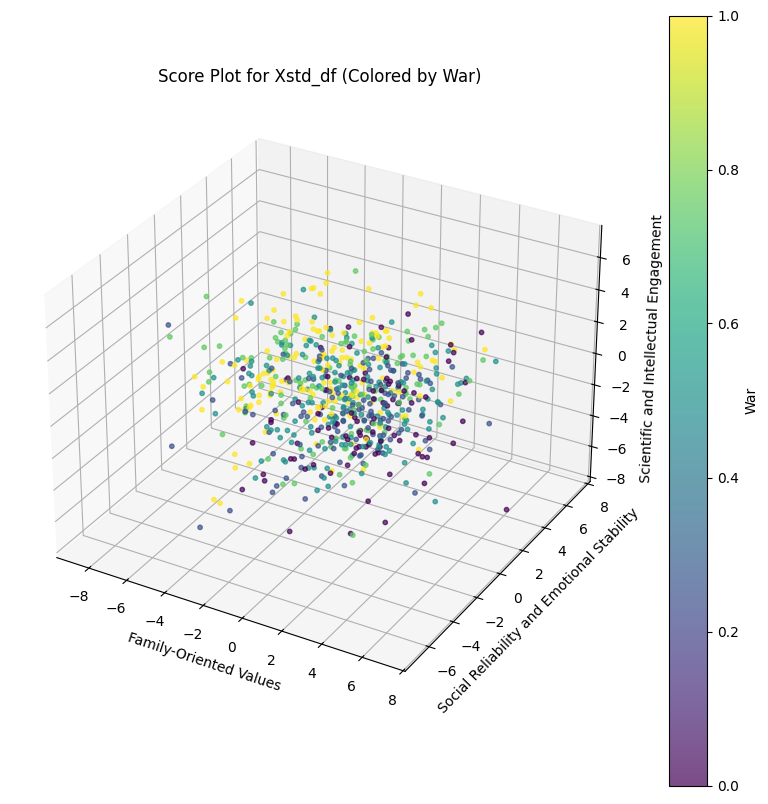

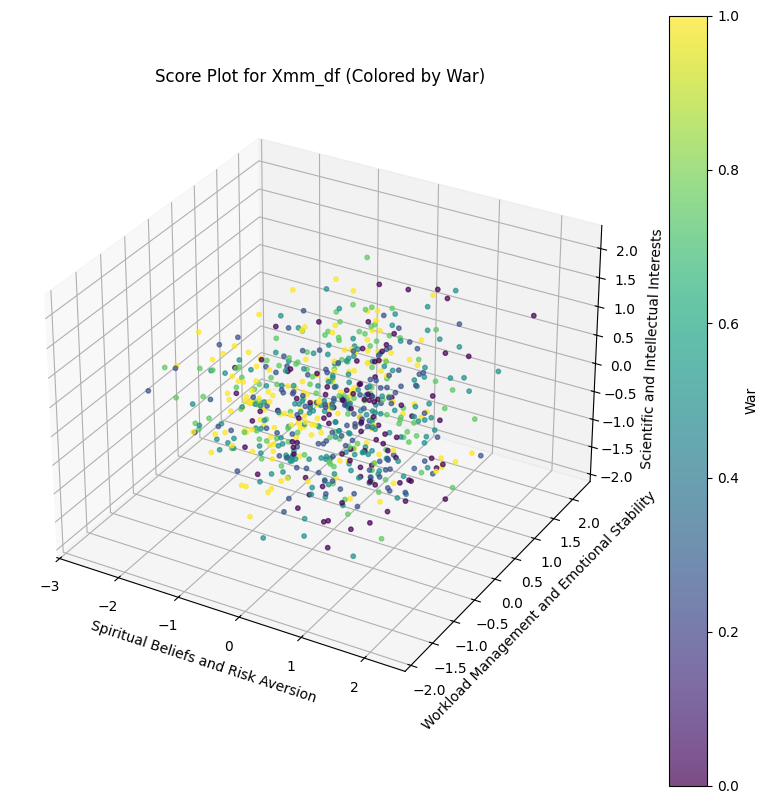

In [18]:
# Ensure label column is in the dataset
label_column = "War"
if label_column not in X_df.columns:
    raise ValueError(f"Label column '{label_column}' not found in the dataframe.")
labels = X_df[label_column]

# Normalize the labels for coloring
label_scaler = MinMaxScaler()
normalized_labels = label_scaler.fit_transform(labels.values.reshape(-1, 1)).flatten()

# Apply PCA transformations if not done yet
dims_std = min(nb_std, 3)
dims_mm = min(nb_mm, 3)
Ystd_df = pca_std.transform(Xstd_df)[:, :dims_std]
Ymm_df = pca_mm.transform(Xmm_df)[:, :dims_mm]

# Score graph with labels for Xstd_df
fig = plt.figure(figsize=(10, 10))
if dims_std == 2:
    # 2D Plot with labels
    ax = fig.add_subplot(111)
    scatter = ax.scatter(Ystd_df[:, 0], Ystd_df[:, 1], c=normalized_labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xlabel(pc_std_names[0])
    ax.set_ylabel(pc_std_names[1])
    plt.colorbar(scatter, label=label_column)
else:
    # 3D Plot with labels
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(Ystd_df[:, 0], Ystd_df[:, 1], Ystd_df[:, 2], c=normalized_labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xlabel(pc_std_names[0])
    ax.set_ylabel(pc_std_names[1])
    ax.set_zlabel(pc_std_names[2])
    fig.colorbar(scatter, ax=ax, label=label_column)
ax.set_title(f"Score Plot for Xstd_df (Colored by {label_column})")
plt.show()

# Repeat for Xmm_df
fig = plt.figure(figsize=(10, 10))
if dims_mm == 2:
    # 2D Plot with labels
    ax = fig.add_subplot(111)
    scatter = ax.scatter(Ymm_df[:, 0], Ymm_df[:, 1], c=normalized_labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xlabel(pc_mm_names[0])
    ax.set_ylabel(pc_mm_names[1])
    plt.colorbar(scatter, label=label_column)
else:
    # 3D Plot with labels
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(Ymm_df[:, 0], Ymm_df[:, 1], Ymm_df[:, 2], c=normalized_labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xlabel(pc_mm_names[0])
    ax.set_ylabel(pc_mm_names[1])
    ax.set_zlabel(pc_mm_names[2])
    fig.colorbar(scatter, ax=ax, label=label_column)
ax.set_title(f"Score Plot for Xmm_df (Colored by {label_column})")
plt.show()

## Exercise 4. $k$-Means

#### 4.1: Determining the Optimal Number of Clusters $k$ for $k$-Means Using Silhouette Scores

Running k-Means for Xstd_df...
Running k-Means with k=3...
Running k-Means with k=4...
Running k-Means with k=5...
Running k-Means with k=6...
Running k-Means with k=7...
Running k-Means with k=8...
Running k-Means with k=9...
Running k-Means with k=10...

****************** RESULTS FOR Xstd_df ******************
Best silhouette score: 0.1757 --> k = 4
*********************************************************

Running k-Means for Xmm_df...
Running k-Means with k=3...
Running k-Means with k=4...
Running k-Means with k=5...
Running k-Means with k=6...
Running k-Means with k=7...
Running k-Means with k=8...
Running k-Means with k=9...
Running k-Means with k=10...

****************** RESULTS FOR Xmm_df ******************
Best silhouette score: 0.1726 --> k = 8
*********************************************************



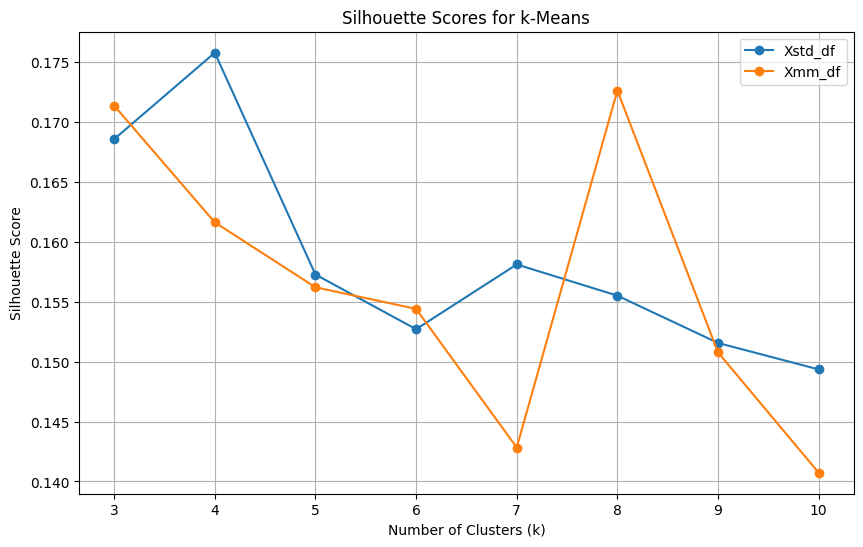

In [19]:
# Lists to store results
km_list_std = []
silcoeff_list_std = []
k_list = list(range(3, 11))  # k values to test

# For Xstd_df
print("Running k-Means for Xstd_df...")
for k in k_list:
    print(f'Running k-Means with k={k}...')
    
    # Initialize and fit k-Means
    km_std = KMeans(n_clusters=k, random_state=random_seed)
    km_std.fit(principal_components_std)
    
    # Store k-Means object and silhouette score
    km_list_std.append(km_std)
    silcoeff_list_std.append(silhouette_score(principal_components_std, km_std.labels_))
    
# Find the best k for Xstd_df
i_best_std = np.argmax(silcoeff_list_std)
best_k_std = k_list[i_best_std]
best_km_std = km_list_std[i_best_std]

print("\n****************** RESULTS FOR Xstd_df ******************")
print(f'Best silhouette score: {silcoeff_list_std[i_best_std]:.4f} --> k = {best_k_std}')
print("*********************************************************\n")

# Repeat the same process for Xmm_df
km_list_mm = []
silcoeff_list_mm = []

print("Running k-Means for Xmm_df...")
for k in k_list:
    print(f'Running k-Means with k={k}...')
    
    # Initialize and fit k-Means
    km_mm = KMeans(n_clusters=k, random_state=random_seed)
    km_mm.fit(principal_components_mm)
    
    # Store k-Means object and silhouette score
    km_list_mm.append(km_mm)
    silcoeff_list_mm.append(silhouette_score(principal_components_mm, km_mm.labels_))

# Find the best k for Xmm_df
i_best_mm = np.argmax(silcoeff_list_mm)
best_k_mm = k_list[i_best_mm]
best_km_mm = km_list_mm[i_best_mm]

print("\n****************** RESULTS FOR Xmm_df ******************")
print(f'Best silhouette score: {silcoeff_list_mm[i_best_mm]:.4f} --> k = {best_k_mm}')
print("*********************************************************\n")

# Visualize silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_list, silcoeff_list_std, label='Xstd_df', marker='o')
plt.plot(k_list, silcoeff_list_mm, label='Xmm_df', marker='o')
plt.title("Silhouette Scores for k-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

#### 4.2: Score Graphs with Cluster Centroids for $k$-Means Clustering

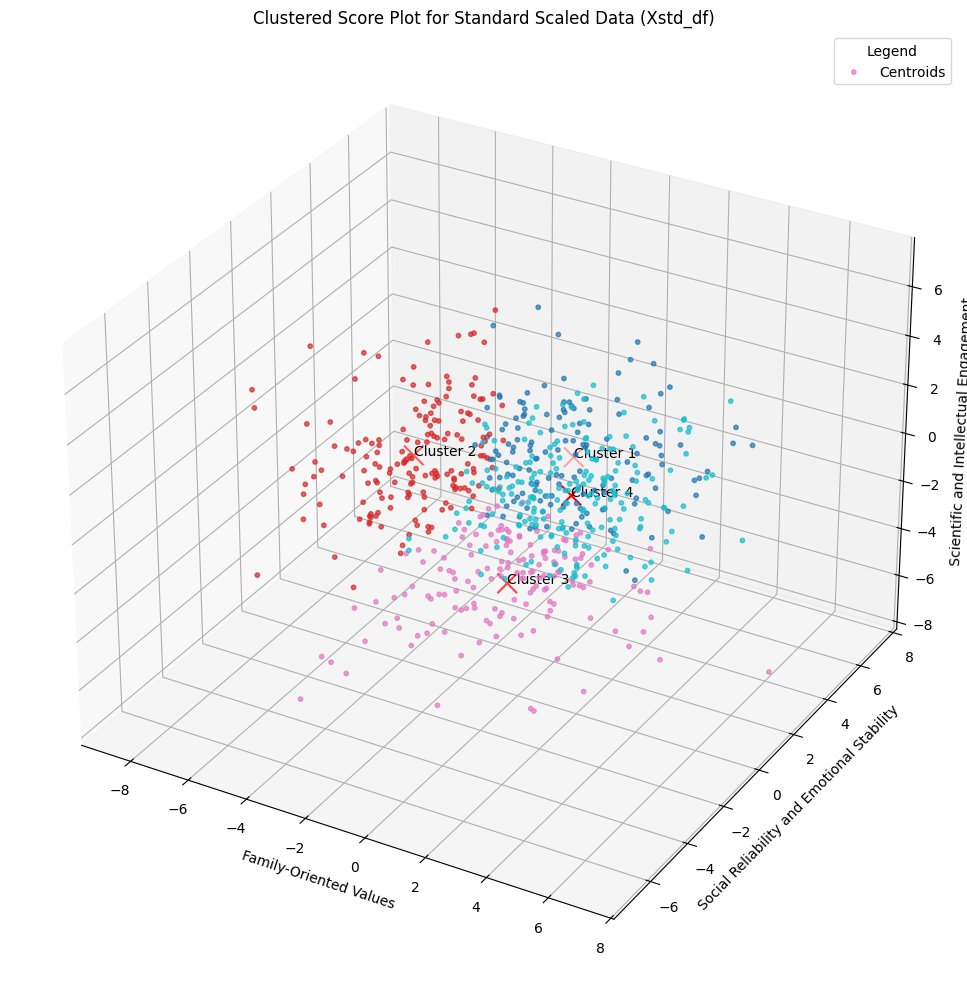

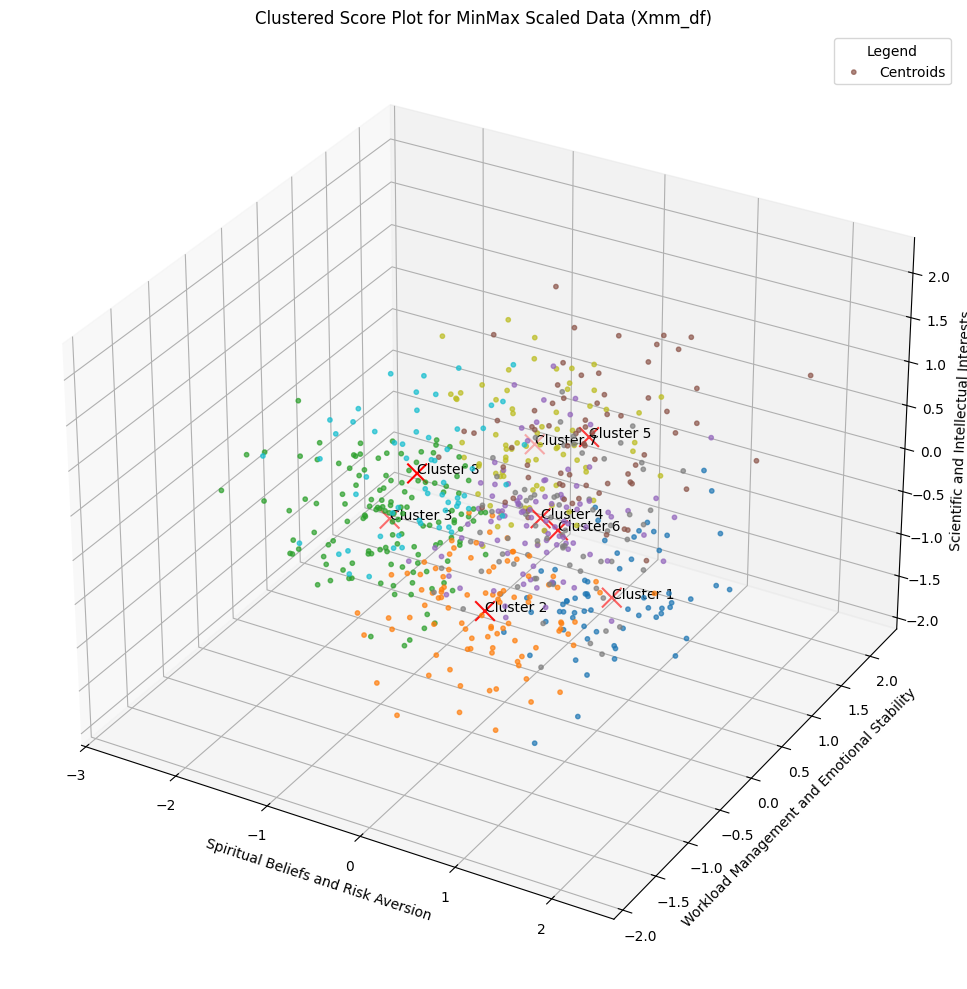

In [20]:
# Helper function to plot score graphs with centroids
def plot_scores_with_centroids(pca_data, centroids, labels, pc_names, dataset_name, dims):
    fig = plt.figure(figsize=(10, 10))
    
    if dims == 2:
        # 2D Scatter Plot
        ax = fig.add_subplot(111)
        scatter = ax.scatter(
            pca_data[:, 0], pca_data[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7
        )
        ax.scatter(
            centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids'
        )
        for kk in range(centroids.shape[0]):
            ax.text(
                centroids[kk, 0], centroids[kk, 1], f'Cluster {kk + 1}',
                color='black', fontsize=10
            )
        ax.set_xlabel(pc_names[0])
        ax.set_ylabel(pc_names[1])
    elif dims == 3:
        # 3D Scatter Plot
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels, cmap='tab10', s=10, alpha=0.7
        )
        ax.scatter(
            centroids[:, 0], centroids[:, 1], centroids[:, 2],
            c='red', marker='x', s=200, label='Centroids'
        )
        for kk in range(centroids.shape[0]):
            ax.text(
                centroids[kk, 0], centroids[kk, 1], centroids[kk, 2],
                f'Cluster {kk + 1}', color='black', fontsize=10
            )
        ax.set_xlabel(pc_names[0])
        ax.set_ylabel(pc_names[1])
        ax.set_zlabel(pc_names[2])
    
    ax.set_title(f"Clustered Score Plot for {dataset_name}")
    ax.legend(loc='upper right', title='Legend', labels=['Centroids'])
    plt.tight_layout()
    plt.show()


# Plot score graphs for Xstd_df
plot_scores_with_centroids(
    principal_components_std, best_km_std.cluster_centers_, best_km_std.labels_,
    pc_std_names, "Standard Scaled Data (Xstd_df)", dims_std
)

# Plot score graphs for Xmm_df
plot_scores_with_centroids(
    principal_components_mm, best_km_mm.cluster_centers_, best_km_mm.labels_,
    pc_mm_names, "MinMax Scaled Data (Xmm_df)", dims_mm
)


#### 4.3: Naming and Interpreting Clusters Based on Centroid Coordinates in PCA Space

In [21]:
# Define centroids
centroids_std = best_km_std.cluster_centers_
centroids_mm = best_km_mm.cluster_centers_

In [22]:
# Analyzing centroids for Xstd_df
print("Centroids in PCA space (Xstd_df):")
std_cluster_names = []
for i, centroid in enumerate(centroids_std):
    print(f"Cluster {i+1}:")
    interpretations = []
    for dim, coord in enumerate(centroid):
        print(f"  {pc_std_names[dim]}: {coord:.2f}")
        if coord > 0.5:
            interpretations.append(f"High {pc_std_names[dim]}")
        elif coord < -0.5:
            interpretations.append(f"Low {pc_std_names[dim]}")
    # Create cluster name based on prominent traits
    cluster_name = f"Cluster {i+1}: {' and '.join(interpretations) if interpretations else 'Balanced Traits'}"
    std_cluster_names.append(cluster_name)

print("\nInterpretations and Cluster Names for Xstd_df:")
for name in std_cluster_names:
    print(name)

Centroids in PCA space (Xstd_df):
Cluster 1:
  Family-Oriented Values: -0.06
  Social Reliability and Emotional Stability: 3.11
  Scientific and Intellectual Engagement: -0.43
  Emotional Variability and Regret: 0.06
  Analytical Thinking and Historical Enthusiasm: -0.37
Cluster 2:
  Family-Oriented Values: -3.21
  Social Reliability and Emotional Stability: -0.49
  Scientific and Intellectual Engagement: 0.93
  Emotional Variability and Regret: 0.10
  Analytical Thinking and Historical Enthusiasm: 0.02
Cluster 3:
  Family-Oriented Values: 0.48
  Social Reliability and Emotional Stability: -1.33
  Scientific and Intellectual Engagement: -2.45
  Emotional Variability and Regret: -0.16
  Analytical Thinking and Historical Enthusiasm: 0.10
Cluster 4:
  Family-Oriented Values: 2.23
  Social Reliability and Emotional Stability: -0.75
  Scientific and Intellectual Engagement: 1.37
  Emotional Variability and Regret: -0.00
  Analytical Thinking and Historical Enthusiasm: 0.16

Interpretations

In [23]:
# Analyzing centroids for Xmm_df
print("Centroids in PCA space (Xmm_df):")
mm_cluster_names = []
for i, centroid in enumerate(centroids_mm):
    print(f"Cluster {i+1}:")
    interpretations = []
    for dim, coord in enumerate(centroid):
        print(f"  {pc_mm_names[dim]}: {coord:.2f}")
        if coord > 0.5:
            interpretations.append(f"High {pc_mm_names[dim]}")
        elif coord < -0.5:
            interpretations.append(f"Low {pc_mm_names[dim]}")
    # Create cluster name based on prominent traits
    cluster_name = f"Cluster {i+1}: {' and '.join(interpretations) if interpretations else 'Balanced Traits'}"
    mm_cluster_names.append(cluster_name)

print("\nInterpretations and Cluster Names for Xmm_df:")
for name in mm_cluster_names:
    print(name)

Centroids in PCA space (Xmm_df):
Cluster 1:
  Spiritual Beliefs and Risk Aversion: 0.90
  Workload Management and Emotional Stability: 0.36
  Scientific and Intellectual Interests: -0.86
  Discipline and Intellectual Engagement: 0.07
  Social Freedom and Risk-Taking: -0.02
Cluster 2:
  Spiritual Beliefs and Risk Aversion: 0.35
  Workload Management and Emotional Stability: -0.78
  Scientific and Intellectual Interests: -0.41
  Discipline and Intellectual Engagement: -0.37
  Social Freedom and Risk-Taking: -0.13
Cluster 3:
  Spiritual Beliefs and Risk Aversion: -1.14
  Workload Management and Emotional Stability: -0.14
  Scientific and Intellectual Interests: -0.25
  Discipline and Intellectual Engagement: 0.05
  Social Freedom and Risk-Taking: 0.02
Cluster 4:
  Spiritual Beliefs and Risk Aversion: 0.39
  Workload Management and Emotional Stability: -0.01
  Scientific and Intellectual Interests: 0.14
  Discipline and Intellectual Engagement: 0.04
  Social Freedom and Risk-Taking: 0.77
C

## Exercise 5. Cluster Evaluations

#### 5.1: External Evaluation of Clustering Results Using Labels

In [24]:
# Define labels for Xstd_df and Xmm_df
labels_std = best_km_std.labels_  # Cluster labels from k-Means for Xstd_df
labels_mm = best_km_mm.labels_   # Cluster labels from k-Means for Xmm_df

In [25]:
true_labels = X_df["History"]

# External evaluation for Xstd_df
ari_std = adjusted_rand_score(true_labels, labels_std)
nmi_std = normalized_mutual_info_score(true_labels, labels_std)

# External evaluation for Xmm_df
ari_mm = adjusted_rand_score(true_labels, labels_mm)
nmi_mm = normalized_mutual_info_score(true_labels, labels_mm)

print(f"External Evaluation for Xstd_df:")
print(f"  Adjusted Rand Index (ARI): {ari_std:.4f}")
print(f"  Normalized Mutual Information (NMI): {nmi_std:.4f}")
print()

print(f"External Evaluation for Xmm_df:")
print(f"  Adjusted Rand Index (ARI): {ari_mm:.4f}")
print(f"  Normalized Mutual Information (NMI): {nmi_mm:.4f}")
print()

# Comments based on results
if ari_std > ari_mm:
    print(f"Xstd_df clustering aligns better with the {true_labels.name} labels.")
elif ari_mm > ari_std:
    print(f"Xmm_df clustering aligns better with the {true_labels.name} labels.")
else:
    print(f"Both datasets have similar alignment with the {true_labels.name} labels.")

External Evaluation for Xstd_df:
  Adjusted Rand Index (ARI): 0.0152
  Normalized Mutual Information (NMI): 0.0300

External Evaluation for Xmm_df:
  Adjusted Rand Index (ARI): 0.0194
  Normalized Mutual Information (NMI): 0.0467

Xmm_df clustering aligns better with the History labels.


#### 5.2: Internal Evaluation of Clustering Results Using Silhouette Scores

Internal Evaluation (Silhouette Scores):
  Average Silhouette Score for Xstd_df: 0.1757
  Average Silhouette Score for Xmm_df: 0.1726


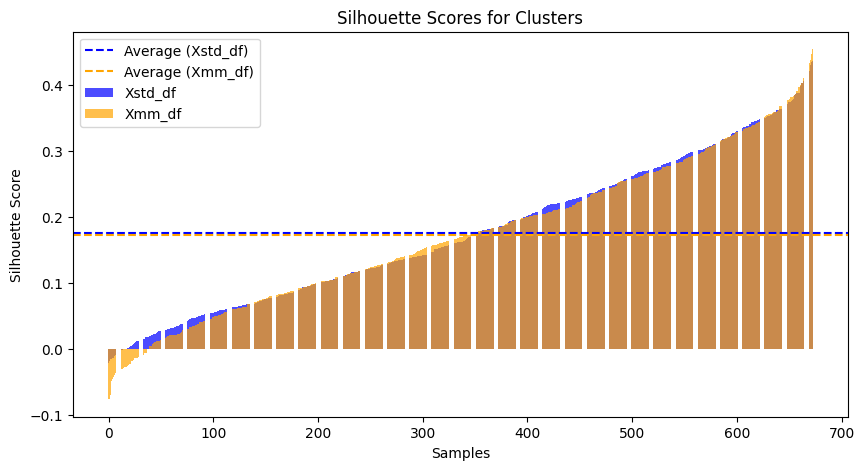

Xstd_df has better internal cluster quality.


In [26]:
# Internal evaluation for Xstd_df
silhouette_vals_std = silhouette_samples(principal_components_std, labels_std)
silhouette_avg_std = silhouette_vals_std.mean()

# Internal evaluation for Xmm_df
silhouette_vals_mm = silhouette_samples(principal_components_mm, labels_mm)
silhouette_avg_mm = silhouette_vals_mm.mean()

print(f"Internal Evaluation (Silhouette Scores):")
print(f"  Average Silhouette Score for Xstd_df: {silhouette_avg_std:.4f}")
print(f"  Average Silhouette Score for Xmm_df: {silhouette_avg_mm:.4f}")

# Visualization of silhouette scores
plt.figure(figsize=(10, 5))
plt.bar(range(len(silhouette_vals_std)), sorted(silhouette_vals_std), alpha=0.7, color='blue', label='Xstd_df')
plt.bar(range(len(silhouette_vals_mm)), sorted(silhouette_vals_mm), alpha=0.7, color='orange', label='Xmm_df')
plt.axhline(y=silhouette_avg_std, color='blue', linestyle='--', label='Average (Xstd_df)')
plt.axhline(y=silhouette_avg_mm, color='orange', linestyle='--', label='Average (Xmm_df)')
plt.title('Silhouette Scores for Clusters')
plt.xlabel('Samples')
plt.ylabel('Silhouette Score')
plt.legend(loc='best')
plt.show()

# Comments based on results
if silhouette_avg_std > silhouette_avg_mm:
    print("Xstd_df has better internal cluster quality.")
elif silhouette_avg_mm > silhouette_avg_std:
    print("Xmm_df has better internal cluster quality.")
else:
    print("Both datasets have similar cluster quality.")